In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import optimize
from scipy.stats import poisson
import math
import sys

In [157]:
#import data from excel
#for india's computer:
data = pd.read_excel('/Users/ibhallaladd/Desktop/sup_junc_data.xlsx', dtype={'Name': str, 'Value': float}, keep_default_na = False)
#for claire's computer:
#data = pd.read_excel(r'C:\Users\clair\OneDrive\Schewl\Junior_Year\AdvancedLab\adv_lab-master\sup_junc_data.xlsx', dtype={'Name': str, 'Value': float}, keep_default_na = False)

In [158]:
data

,NIN_1_1_inc_I,NIN_1_1_inc_V,NIN_1_1_inc_V_err,NIN_1_1_dec_I,NIN_1_1_dec_V,NIN_1_1_dec_V_err,SIN_1_1_inc_I,SIN_1_1_inc_V,SIN_1_1_inc_V_err,SIN_1_1_dec_I,SIN_1_1_dec_V,SIN_1_1_dec_V_err,SIS_1_1_inc_I,SIS_1_1_inc_V,SIS_1_1_inc_V_err,SIS_1_1_dec_I,SIS_1_1_dec_V,SIS_1_1_dec_V_err
0,-0.0005,-0.0073252,1.5418e-05,-0.0005,-0.0073274,2.7669e-05,-0.0005,-0.0090332,0,-0.0005,-0.0090315,2.0365e-05,-0.000020,-0.001388,0.000003,-0.000020,-0.001396,0.000003
1,-0.00049,-0.0073076,6.1492e-05,-0.00049,-0.0073242,0,-0.00049,-0.008792,2.6597e-05,-0.00049,-0.0087898,1.3359e-05,-0.000020,-0.001387,0.000003,-0.000020,-0.001395,0.000003
2,-0.00048,-0.0070801,0,-0.00048,-0.0070854,3.5829e-05,-0.00048,-0.0087288,0.00010534,-0.00048,-0.0086831,0.00012106,-0.000020,-0.001387,0.000002,-0.000020,-0.001394,0.000004
3,-0.00047,-0.0070271,0.00010069,-0.00047,-0.0070586,6.9198e-05,-0.00047,-0.0085449,0,-0.00047,-0.0085449,0,-0.000020,-0.001386,0.000002,-0.000020,-0.001393,0.000005
4,-0.00046,-0.0068359,0,-0.00046,-0.0068379,2.176e-05,-0.00046,-0.0083064,3.6616e-05,-0.00046,-0.008304,2.7669e-05,-0.000020,-0.001386,0.000003,-0.000020,-0.001391,0.000005
5,-0.00045,-0.0067861,9.843e-05,-0.00045,-0.0068357,7.7204e-06,-0.00045,-0.0082878,5.4723e-05,-0.00045,-0.0082798,6.8483e-05,-0.000019,-0.001385,0.000004,-0.000019,-0.001390,0.000005
6,-0.00044,-0.0065918,0,-0.00044,-0.0065928,1.5418e-05,-0.00044,-0.0080566,0,-0.00044,-0.0080566,0,-0.000019,-0.001383,0.000005,-0.000019,-0.001389,0.000004
7,-0.00043,-0.0065056,0.00011673,-0.00043,-0.0065439,9.6965e-05,-0.00043,-0.0079104,0.00011971,-0.00043,-0.0078511,8.9093e-05,-0.000019,-0.001382,0.000005,-0.000019,-0.001389,0.000004
8,-0.00042,-0.0063479,7.7204e-06,-0.00042,-0.0063477,0,-0.00042,-0.0078108,2.0365e-05,-0.00042,-0.0078062,3.8871e-05,-0.000019,-0.001381,0.000005,-0.000019,-0.001388,0.000003
9,-0.00041,-0.0063459,2.0365e-05,-0.00041,-0.0063406,4.0989e-05,-0.00041,-0.0075684,0,-0.00041,-0.0075684,0,-0.000019,-0.001380,0.000004,-0.000019,-0.001388,0.000003


In [208]:

#guesses for the fit parameters
R     = 0
delta = 0
T     = 0

NIN_Iinc_err = np.zeros(100)
firstGuess = [R, delta, T]

NIN_Vinc = data['NIN_1_1_inc_V'][0:100]
NIN_Iinc = 10*(data['NIN_1_1_inc_I'][0:100])
NIN_Vinc_err = data['NIN_1_1_inc_V_err'][0:100]

SIN_Vinc = data['SIN_1_1_inc_V'][0:100]
SIN_Iinc = 10*(data['SIN_1_1_inc_I'][0:100])
SIN_Vinc_err = data['SIN_1_1_inc_V_err'][0:100]

SIN_Vdec = data['SIN_1_1_dec_V'][0:100]
SIN_Idec = 10*(data['SIN_1_1_dec_I'][0:100])
SIN_Vdec_err = data['SIN_1_1_dec_V_err'][0:100]

SIS_Vinc = data['SIS_1_1_inc_V']
SIS_Iinc = 100*(data['SIS_1_1_inc_I'])
SIS_Vinc_err = data['SIS_1_1_inc_V_err']


#print(np.max(NIN_Vinc_err))

for p in range(len(NIN_Vinc_err)):
    #NIN_Vinc_err[p] = 4.07033333333e-05
    if NIN_Vinc_err[p] == 0:
        NIN_Vinc_err[p] = np.max(NIN_Vinc_err)/3
        
    if SIS_Vinc_err[p] == 0:
        SIS_Vinc_err[p] = np.max(SIS_Vinc_err)/3
        
    if SIN_Vinc_err[p] == 0:
        SIN_Vinc_err[p] = np.max(SIN_Vinc_err)/3
    #else:
        #NIN_Vinc_err[p] = NIN_Vinc_err[p]/3

#for i in range(len([NIN_Iinc])):
 #   NIN_Iinc[i] = 10*NIN_Iinc[i]
   # SIN_Iinc[i] = 10*SIN_Iinc[i]
  #  SIN_Idec[i] = 10*SIN_Idec[i]
#print(NIN_Vinc_err)
print(NIN_Vinc_err)



0      1.5418e-05
1      6.1492e-05
2     4.07033e-05
3      0.00010069
4     4.07033e-05
5       9.843e-05
6     4.07033e-05
7      0.00011673
8      7.7204e-06
9      2.0365e-05
10    4.07033e-05
11     7.3279e-05
12     7.7204e-06
13     7.5193e-05
14    4.07033e-05
15     0.00011256
16    4.07033e-05
17     0.00011204
18    4.07033e-05
19     0.00011908
20    4.07033e-05
21     0.00012198
22    4.07033e-05
23     0.00012113
24    4.07033e-05
25     0.00011703
26    4.07033e-05
27     0.00012211
28    4.07033e-05
29     9.8787e-05
         ...     
70     9.3843e-05
71    4.07033e-05
72     6.7388e-05
73    4.07033e-05
74     0.00010232
75    4.07033e-05
76     7.8511e-05
77    4.07033e-05
78     0.00011084
79    4.07033e-05
80     0.00011739
81    4.07033e-05
82     0.00012161
83    4.07033e-05
84     0.00012172
85    4.07033e-05
86     0.00011951
87    4.07033e-05
88     0.00010832
89    4.07033e-05
90      0.0001115
91    4.07033e-05
92     7.6427e-05
93    4.07033e-05
94     0.0

In [191]:
#Volatage is in V
#Current is in A
def NINcurr(v, params=[]):
    r_0 = params[0]
    b   = params[1]
    
    i   = np.zeros(len(v))
    
    for j in range(len(v)):
        i[j] = v[j]/r_0 + b/r_0
   
    return i

In [161]:
def SINcurr(v, params=[]):
    # energy and temperature measured in voltage units
    #    1 meV = 1 mV
    #    1 K   = 0.0861 mV
    # Setting parameters
    
    r_0    = params[0]
    delta  = params[1]
    t      = params[2]
    
    
    e_max  = 5 #cutoff for approximating integral
    e_step = 0.01 #step size for approximating integral
    #r_par  = 99999 #resistance parallel to junction
    
    e = np.arange(-e_max, e_max, e_step)
    nptse = len(e)
    
    #Import voltage data
    #Rather than taking this vector of uniformly spaced fake voltages,
    #you should import a vector containing your real voltage data.
    nptsv = len(v)
    ds_pb = np.zeros(nptse)
    di = np.zeros(nptse)
    itot = np.zeros(nptsv)
    
    # step over voltage
    # for k=1:nptsv
    for k in range(nptsv):
        vv = v[k]
        
        # do the integral over e
        for j in range(nptse):
            if np.absolute(e[j]) > delta:
                # tame divergence in bcs density of states used .99 instead of 1
                #ds_pb[j] = np.absolute(e[j])/np.sqrt((e[j])**2 - (0.99*delta)**2
                ds_pb[j] = np.absolute(e[j])/np.sqrt((e[j])**2 - 0.99*delta**2)
                #ds_pb(j)=abs(e(j))/sqrt((e(j))^2 - 0.99*delta^2);
                
            else:
                ds_pb[j] = 0
                
            di[j] = ds_pb[j]*(1/(np.exp(e[j]/t)+1)-1/(np.exp((e[j]+vv)/t)+1))
            
        # integrate with trapezoid rule include a parallel resistance r_par
        #itot[k] = np.trapz(di,e)/r_0 + vv/r_par
        itot[k] = np.trapz(di,e)/r_0 
        
    return itot

In [162]:
def SIScurr(v, params=[]):
    # energy and temperature measured in voltage units
    #    1 meV = 1 mV
    #    1 K   = 0.0861 mV
    # Setting parameters
    
    r_0       = params[0]
    delta_pb  = params[1]
    delta_al  = params[2]
    t         = params[3] 
    

    e_max    = 5 #cutoff for approximating integral
    
    e_step   = 0.01 #step size for approximating integral
    #r_par    = 999 #resistance parallel to junction
    
    e        = np.arange(-e_max, e_max, e_step)
    nptse    = len(e)
    #Import voltage data
    #Rather than taking this vector of uniformly spaced fake voltages,
    #you should import a vector containing your real voltage data.
    nptsv = len(v)
    ds_pb = np.zeros(nptse)
    ds_al = np.zeros(nptse)
    di = np.zeros(nptse)
    itot = np.zeros(nptsv)
    # step over voltage
    # for k=1:nptsv
    #at what point are things being set to 0? -- stop the integral at that time to save time
    for k in range(nptsv):
        vv = v[k]
        # do the integral over e
        for j in range(nptse):
            if np.absolute(e[j]+vv) > delta_pb:
                # tame divergence in bcs density of states used .99 instead of 1
                ds_pb[j] = np.absolute(e[j])/np.sqrt((e[j]+vv)**2-.99*delta_pb**2)
            else:
                ds_pb[j] = 0
            if np.absolute(e[j]) > delta_al:
                # tame divergence in bcs density of states used .99 instead of 1
                ds_al[j] = np.absolute(e[j]+vv)/np.sqrt((e[j])**2-.99*delta_al**2)
            else:
                ds_al[j] = 0            
            di[j] = ds_pb[j]*ds_al[j]*(1/(np.exp(e[j]/t)+1)-1/(np.exp((e[j]+vv)/t)+1))
        # integrate with trapezoid rule include a parallel resistance r_par
        #itot[k] = np.trapz(di,e)/r_0 + vv/r_par
        itot[k] = np.trapz(di,e)/r_0 
        
    return itot

In [163]:
#DEBUGGING NIN FIT
def herbertNIN(v, current, current_err, firstGuess = []):

    #original parameter guesses
    r_0   = firstGuess[0]
    r_sig = firstGuess[1]
    b_0   = firstGuess[2]
    b_sig = firstGuess[3]
    
    #range over which to evaluate 
    #R range is small
    print(str((2 * r_sig)))
    print(str(np.divide(2*r_sig,3*10)))
    R_range = np.arange(r_0 - r_sig, r_0 + r_sig, (2 * r_sig)/30)
    b_range = np.arange(b_0 - b_sig, b_0 + b_sig, (2 * b_sig)/30)
    
    #final optimized values of fit parameters
    optim_R = 0
    optim_b = 0
    lsq     = 0
    I       = 0
    optim_chi_sq = 0
    #default maximum value
    scoreboard = sys.float_info.max
    
    #make this into a big data  c u b e  and then search through for a min -- avoid edge cases
    #data_square = [np.zeros(len(R_range))][np.zeros(len(b_range))]
    #data_square = [0 for w in range(len(R_range))] [0 for p in range(len(b_range))]
    data_square = [[0]*len(R_range)]*len(b_range)

    
    for j in range(len(R_range)):        
        for k in range(len(b_range)):
            chi_sq = 0
            lsq    = 0
            sum_lsq = 0
            #calculate reduced chi squared
            I_fit = NINcurr(v, [ R_range[j], b_range[k]])
            #print('R:' + str(R_range[j]))
            current_err = current_err/R_range[j]
            #print(str(current_err))
            #print(str(current))
            
            #we replaced error with a constant, need to put back real error
            for m in range(len(v)):
                lsq = ((I_fit[m] - current[m])**2)/(current_err[m])
                sum_lsq += lsq

            print("lsq = " + str(lsq))    
            chi_sq = sum_lsq/(len(v)-2)
            chi_sq = bitch(v, I_fit*R_range[j], 2)
            print("chisq = " + str(chi_sq))
            data_square[j][k] = chi_sq
            
            if (chi_sq < scoreboard):
                print('surpassed scoreboard:' + str(chi_sq))
                optim_chi_sq = chi_sq
                scoreboard = chi_sq
                optim_R    = R_range[j]
                optim_b    = b_range[k]
            
   # for i in range(len(R_range)):
    #    for j in range(len(b_range)):
            
              
    #Here, we need to find a way to find the min value in the array                     
    print("R: " + str(optim_R) + "\nb: " + str(optim_b) + "\nchi_sq: " + str(optim_chi_sq))   
    return optim_R, optim_b, data_square

In [221]:
#DEBUGGING SIN FIT
def herbertSIN(v, current, current_err, firstGuess = []):

    #original parameter guesses
    r        = firstGuess[0]
    r_sig    = firstGuess[1]
    delt     = firstGuess[2]
    delt_sig = firstGuess[3]
    t        = firstGuess[4]
    t_sig    = firstGuess[5]
    
    #range over which to evaluate 
    #R range is small
    R_range = np.arange(r - r_sig, r + r_sig, (2 * r_sig)/10)
    del_range = np.arange(delt - delt_sig, delt + delt_sig, (2 * delt_sig)/15) 
    #will need to go over a larger range, 0.0005-0.003 (the full value)
    T_range = np.arange(t - t_sig, t + t_sig, (2 * t_sig)/15)
    
    #DEBUGGING
    #R_range = np.arange(r - r_sig, r + r_sig, (2 * r_sig)/5)
    #del_range = np.arange(delt - delt_sig, delt + delt_sig, (2 * delt_sig)/5) 
    #T_range = np.arange(t - t_sig, t + t_sig, (2 * t_sig)/5)
    
    #final optimized values of fit parameters
    optim_R = 0
    optim_del = 0
    optim_T   = 0
    lsq     = 0
    I       = 0
    optim_chi_sq = 0
    progress = 0
    progress_denom = len(R_range)*len(del_range)*len(T_range)
    #default maximum value
    scoreboard = sys.float_info.max
    
    #make this into a big data  c u b e  and then search through for a min -- avoid edge cases
    #data_square = [np.zeros(len(R_range))][np.zeros(len(b_range))]
    #data_square = [0 for w in range(len(R_range))] [0 for p in range(len(b_range))]
    data_cube = [[[0]*len(R_range)]*len(del_range)]*len(T_range)
    
    coords = [0,0,0]

    
    for i in range(len(R_range)):        
        for j in range(len(del_range)):
            for k in range(len(T_range)):
                chi_sq = 0
                lsq    = 0
                sum_lsq = 0
                #calculate reduced chi squared
                I_fit = SINcurr(v, [ R_range[i], del_range[j], T_range[k] ])
                #print('R:' + str(R_range[j]))
                #current_err = current_err/R_range[i]
                #print(str(current_err))
                #print(str(current))

                #we replaced error with a constant, need to put back real error
                for m in range(len(v)):
                    lsq = ((I_fit[m] - current[m])**2)/(10e-5)
                    sum_lsq += lsq

                #print("lsq = " + str(lsq))    
                chi_sq = sum_lsq/(len(v)-3)
                #print("chisq = " + str(chi_sq))
                #data_square[k][j][i] = chi_sq
                #data_cube[i][j][k] = chi_sq
                print('chisq test: ' + str(chi_sq))
                #print('data cube ijk: ' + str(data_cube[i][j][k]))
                
                chi_sq = bitch(v, I_fit*R_range[i], 3)
                
                print('chisq bitch: ' + str(chi_sq))


                progress = progress + 1
                print('progress: '+ str(progress)+'/'+str(progress_denom))
                

                if (chi_sq < scoreboard):
                    print('surpassed scoreboard:' + str(chi_sq))
                    optim_chi_sq = chi_sq
                    optim_R    = R_range[i]
                    optim_del  = del_range[j]
                    optim_T    = T_range[k]
                    #coords     = [k, j, i]
                    coords     = [i, j, k]
                    print('coords: ' + str(coords))
                    scoreboard = chi_sq
                    

   # for i in range(len(R_range)):
    #    for j in range(len(b_range)):
            
              
    #Here, we need to find a way to find the min value in the array                     
    print("R: " + str(optim_R) + "\ndel: " + str(optim_del) + "\nT: " + str(optim_T)+"\nchi_sq: " + str(optim_chi_sq) + '\ncoords: ' + str(coords))   
    return optim_R, optim_del, optim_T, data_cube, coords





In [165]:
#DEBUGGING SIS FIT
def herbertSIS(v, current, current_err, firstGuess = []):

    #original parameter guesses
    r           = firstGuess[0]
    r_sig       = firstGuess[1]
    delt_pb     = firstGuess[2]
    delt_pb_sig = firstGuess[3]
    delt_al     = firstGuess[4]
    delt_al_sig = firstGuess[5]
    t           = firstGuess[6]
    t_sig       = firstGuess[7]
    
    #range over which to evaluate 
    #R range is small
    R_range = np.arange(r - r_sig, r + r_sig, (2 * r_sig)/10)
    del_pb_range = np.arange(delt_pb - delt_pb_sig, delt_pb + delt_pb_sig, (2 * delt_pb_sig)/30) 
    del_al_range = np.arange(delt_al - delt_al_sig, delt_al + delt_al_sig, (2 * delt_al_sig)/30) 

    
    R_range = np.arange(r - r_sig, r + r_sig, (2 * r_sig)/5)
    del_pb_range = np.arange(delt_pb - delt_pb_sig, delt_pb + delt_pb_sig, (2 * delt_pb_sig)/5) 
    del_al_range = np.arange(delt_al - delt_al_sig, delt_al + delt_al_sig, (2 * delt_al_sig)/5)
    
    #will need to go over a larger range, 0.0005-0.003 (the full value)
    T_range = np.arange(t - t_sig, t + t_sig, (2 * t_sig)/30)
    
    #final optimized values of fit parameters
    optim_R      = 0
    optim_del_pb = 0
    optim_del_al = 0
    optim_T      = 0
    lsq          = 0
    I            = 0
    optim_chi_sq = 0
    progress     = 0
    progress_denom = len(R_range)*len(del_pb_range)*len(del_al_range)*len(T_range)
    #default maximum value
    scoreboard = sys.float_info.max
    coords = [0, 0, 0, 0]
    
    #make this into a big data  c u b e  and then search through for a min -- avoid edge cases
    #data_square = [np.zeros(len(R_range))][np.zeros(len(b_range))]
    #data_square = [0 for w in range(len(R_range))] [0 for p in range(len(b_range))]
    data_square = [[[[0]*len(R_range)]*len(del_pb_range)]*len(del_al_range)]*len(T_range)

    
    for i in range(len(R_range)):        
        for j in range(len(del_pb_range)):
            for k in range(len(del_al_range)):
                for n in range(len(T_range)):
                    chi_sq = 0
                    lsq    = 0
                    sum_lsq = 0
                    #calculate reduced chi squared
                    I_fit = SIScurr(v, [ R_range[i], del_pb_range[j], del_al_range[k], T_range[n] ])
                    #print('R:' + str(R_range[j]))

                    #print(str(current_err))
                    #print(str(current))

                    #we replaced error with a constant, need to put back real error
                    for m in range(len(v)):
                        lsq = ((I_fit[m] - current[m])**2)/(10e-10)
                        sum_lsq += lsq

                    #print("lsq = " + str(lsq))    
                    chi_sq = sum_lsq/(len(v)-2)
                    
                    chi_sq = bitch(v, I_fit*R_range[i], 4) 
                    
                    #print("chisq = " + str(chi_sq))
                    #data_square[i][j][k][n] = chi_sq
                    progress = progress + 1
                    print('progress: '+ str(progress)+'/'+str(progress_denom))


                    if (chi_sq < scoreboard):
                        print('surpassed scoreboard:' + str(chi_sq))
                        optim_chi_sq  = chi_sq
                        scoreboard    = chi_sq
                        optim_R       = R_range[i]
                        optim_del_pb  = del_pb_range[j]
                        optim_del_al  = del_al_range[k]
                        optim_T       = T_range[n]
                        coords        = [i, j, k, n]

   # for i in range(len(R_range)):
    #    for j in range(len(b_range)):
            
              
    #Here, we need to find a way to find the min value in the array                     
    print("R: " + str(optim_R) + "\ndelPb: " + str(optim_del_pb) + "\ndelAl: " + str(optim_del_al) + "\nT: " + str(optim_T)+"\nchi_sq: " + str(optim_chi_sq))   
    return optim_R, optim_del_pb, optim_del_al, optim_T, data_square, coords

4.0
0.13333333333333333
lsq = 0.4226344692490378
chisq = 0.002551020408163267
surpassed scoreboard:0.002551020408163267
lsq = 0.22103350137853844
chisq = 0.003276643990929704
lsq = 0.11548407523271363
chisq = 0.004092970521541956
lsq = 0.06028029547129636
chisq = 0.005000000000000011
lsq = 0.03143657445472661
chisq = 0.005997732426303848
lsq = 0.016380149482706847
chisq = 0.007086167800453501
lsq = 0.008527830316927358
chisq = 0.008265306122448978
lsq = 0.004436205170201731
chisq = 0.009535147392290269
lsq = 0.0023059537029454322
chisq = 0.010895691609977333
lsq = 0.0011977554663827696
chisq = 0.012346938775510206
lsq = 0.0006216935686402968
chisq = 0.013888888888888874
lsq = 0.0003224679660415472
chisq = 0.015521541950113349
lsq = 0.00016715120587994434
chisq = 0.01724489795918365
lsq = 8.658753036879317e-05
chisq = 0.019058956916099788
lsq = 4.482638689842491e-05
chisq = 0.020963718820861704
lsq = 2.3192833306035544e-05
chisq = 0.022959183673469365
lsq = 1.1992901081333773e-05
chisq 

lsq = 7.474040101270469e-22
chisq = 0.015521541950113361
lsq = 1.1873026665664394e-21
chisq = 0.017244897959183655
lsq = 1.8097406602973607e-21
chisq = 0.019058956916099788
lsq = 2.6727896423461834e-21
chisq = 0.020963718820861704
lsq = 3.850382045665463e-21
chisq = 0.022959183673469368
lsq = 5.436247261369166e-21
chisq = 0.025045351473922933
lsq = 7.548763021494936e-21
chisq = 0.027222222222222217
lsq = 1.0336925006415751e-20
chisq = 0.029489795918367374
lsq = 1.3987681159913993e-20
chisq = 0.03184807256235834
lsq = 1.8734929711152868e-20
chisq = 0.034297052154194964
lsq = 2.487054331383364e-20
chisq = 0.03683673469387757
lsq = 3.2757858230888215e-20
chisq = 0.03946712018140584
lsq = 4.2848159771646813e-20
chisq = 0.04218820861678002
lsq = 5.570080640910396e-20
chisq = 0.04500000000000008
lsq = 7.200776898094834e-20
chisq = 0.04790249433106589
lsq = 9.262352267797228e-20
chisq = 0.0508956916099773
lsq = 1.186014236188583e-19
chisq = 0.0539795918367348
lsq = 1.5123793525162242e-19
chis

lsq = 1722233742.4126976
chisq = 0.0539795918367348
lsq = 2927942823.619063
chisq = 0.05715419501133798
lsq = 4963042963.764966
chisq = 0.06041950113378685
lsq = 55219502641.04573
chisq = 0.0025510204081632664
lsq = 105221117931.91533
chisq = 0.0032766439909297025
lsq = 200397879387.30615
chisq = 0.004092970521541956
lsq = 381466088237.9061
chisq = 0.0050000000000000105
lsq = 725744600103.2637
chisq = 0.005997732426303845
lsq = 1379967410484.5125
chisq = 0.007086167800453505
lsq = 2622422461483.1235
chisq = 0.00826530612244898
lsq = 4980541048450.99
chisq = 0.009535147392290269
lsq = 9453251216966.438
chisq = 0.010895691609977333
lsq = 17931100611499.453
chisq = 0.012346938775510203
lsq = 33989399764380.117
chisq = 0.013888888888888874
lsq = 64384301984386.63
chisq = 0.015521541950113354
lsq = 121872287645158.94
chisq = 0.01724489795918365
lsq = 230518755088664.9
chisq = 0.019058956916099788
lsq = 435683416537919.25
chisq = 0.020963718820861704
lsq = 822783556927325.9
chisq = 0.0229591

lsq = 1.2810500047267119e+66
chisq = 0.009535147392290269
lsq = 3.30996785046657e+66
chisq = 0.01089569160997733
lsq = 8.550714234852205e+66
chisq = 0.012346938775510206
lsq = 2.2085152505402275e+67
chisq = 0.013888888888888876
lsq = 5.703168851312434e+67
chisq = 0.015521541950113358
lsq = 1.4724760906397457e+68
chisq = 0.01724489795918365
lsq = 3.800973110562963e+68
chisq = 0.019058956916099788
lsq = 9.809664291106088e+68
chisq = 0.020963718820861704
lsq = 2.531188689162028e+69
chisq = 0.022959183673469365
lsq = 6.529863406555849e+69
chisq = 0.025045351473922933
lsq = 1.6841896186859572e+70
chisq = 0.0272222222222222
lsq = 4.3429341479427764e+70
chisq = 0.029489795918367374
lsq = 1.1196411823961768e+71
chisq = 0.03184807256235833
lsq = 2.885863429260641e+71
chisq = 0.034297052154194964
lsq = 7.436555728071918e+71
chisq = 0.036836734693877625
lsq = 1.9158647264583707e+72
chisq = 0.03946712018140587
lsq = 4.934606273830462e+72
chisq = 0.04218820861678002
lsq = 1.2706691109811873e+73
chi

lsq = 7.282167518372433e+140
chisq = 0.025045351473922933
lsq = 2.370265580125421e+141
chisq = 0.0272222222222222
lsq = 7.714218430534647e+141
chisq = 0.029489795918367374
lsq = 2.5104111370370544e+142
chisq = 0.03184807256235833
lsq = 8.168742059406868e+142
chisq = 0.034297052154194964
lsq = 2.657800131493978e+143
chisq = 0.036836734693877556
lsq = 8.64660549687821e+143
chisq = 0.0394671201814059
lsq = 2.8127072462076475e+144
chisq = 0.04218820861678002
lsq = 9.148677911704502e+144
chisq = 0.045000000000000116
lsq = 2.975407176640198e+145
chisq = 0.04790249433106588
lsq = 9.675826341895768e+145
chisq = 0.0508956916099773
lsq = 3.1461732135225317e+146
chisq = 0.05397959183673479
lsq = 1.0228910925591464e+147
chisq = 0.05715419501133798
lsq = 3.325275640244522e+147
chisq = 0.06041950113378685
lsq = 1.7610275378648676e+148
chisq = 0.002551020408163267
lsq = 5.975934672409851e+148
chisq = 0.0032766439909297043
lsq = 2.0277559925763263e+149
chisq = 0.004092970521541956
lsq = 6.880109515405

lsq = 2.543647430912815e+230
chisq = 0.04790249433106589
lsq = 9.981489128512566e+230
chisq = 0.0508956916099773
lsq = 3.916591974442599e+231
chisq = 0.0539795918367348
lsq = 1.5367230724132206e+232
chisq = 0.05715419501133798
lsq = 6.029161296251266e+232
chisq = 0.06041950113378685
lsq = 3.406755731977479e+233
chisq = 0.0025510204081632677
lsq = 1.3841356380957919e+234
chisq = 0.003276643990929704
lsq = 5.6233911871700574e+234
chisq = 0.004092970521541957
lsq = 2.2845452553382917e+235
chisq = 0.0050000000000000105
lsq = 9.280746115082392e+235
chisq = 0.005997732426303845
lsq = 3.7700534389898105e+236
chisq = 0.007086167800453505
lsq = 1.531416899553123e+237
chisq = 0.008265306122448976
lsq = 6.220431401653722e+237
chisq = 0.009535147392290269
lsq = 2.5265537302738492e+238
chisq = 0.010895691609977333
lsq = 1.0261653737238705e+239
chisq = 0.012346938775510203
lsq = 4.167607161366344e+239
chisq = 0.013888888888888874
lsq = 1.6925309252331648e+240
chisq = 0.015521541950113354
lsq = 6.873

(-0.01, 0.01)

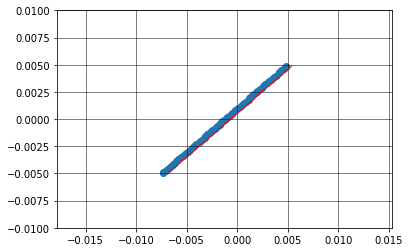

In [192]:
optim_R, optim_b, data_square = herbertNIN(NIN_Vinc, NIN_Iinc, NIN_Vinc_err, [2.5, 2.0, 0.0015, .001])
#NOTE: WHAT IS REPORTED AS R (UNLESS OTHERWISE SPECIFIED) IS ACTUALLY 1/R

plt.scatter(NIN_Vinc, NIN_Iinc)
#plt.plot(NIN_Vinc, NINcurr(NIN_Vinc, [optim_R, optim_b]), color='r', linewidth=1)
plt.plot(NINcurr(NIN_Vinc, [optim_R, optim_b])*optim_R,NIN_Iinc, color='r', linewidth=1)
plt.grid(color='k', linestyle='-', linewidth=0.5)

#plt.xlim(-.1, .1)
plt.ylim(-.01, .01)

0.701068375397949


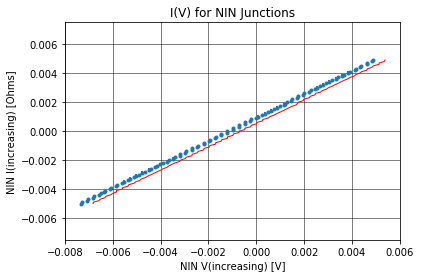

In [205]:
#NINparams = [1.2999999999999998, 0.001166666666666667]
NINparams = [1.0333333333333332, 0.0005]
#NINparams = [0.5, 0.0005]

#plt.scatter(NIN_Vinc, NIN_Iinc)
#plt.plot(NIN_Vinc, NINcurr(NIN_Vinc, NINparams), color='r', linewidth=1)

plt.errorbar(NIN_Vinc, NIN_Iinc,yerr=NIN_Vinc_err, marker='.', elinewidth=2, linewidth=0)
plt.plot(NINcurr(NIN_Vinc, NINparams)*NINparams[0], NIN_Iinc, color='r', linewidth=1)



#plt.errorbar(NIN_Iinc, NIN_Vinc,yerr=NIN_Vinc_err, marker='.', markerfacecolor='None', elinewidth=1, linewidth=0)
#plt.plot(NIN_Iinc, NINcurr(NIN_Vinc, NINparams)*NINparams[0], color='r', linewidth=1)

#plt.errorbar(NINcurr(NIN_Vinc, NINparams)*NINparams[0], NIN_Iinc, yerr=NIN_Vinc_err,color='r', linewidth=1)
plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.xlim(-0.008, 0.006)
plt.ylim(-0.0075, 0.0075)
#plt.ylim(0, 0.001)
plt.xlabel('NIN V(increasing) [V]')
plt.ylabel('NIN I(increasing) [Ohms]')
plt.title("I(V) for NIN Junctions")

print(str(bitch_err(NIN_Vinc, NINcurr(NIN_Vinc, NINparams)*NINparams[0], NIN_Vinc_err, 2)*len(NIN_Vinc_err)))
#print(str(bitch(NIN_Vinc, NINcurr(NIN_Vinc, NINparams)*NINparams[0], 2)))

In [172]:
NIN_Vinc_err

0      1.5418e-05
1      6.1492e-05
2     4.07033e-05
3      0.00010069
4     4.07033e-05
5       9.843e-05
6     4.07033e-05
7      0.00011673
8      7.7204e-06
9      2.0365e-05
10    4.07033e-05
11     7.3279e-05
12     7.7204e-06
13     7.5193e-05
14    4.07033e-05
15     0.00011256
16    4.07033e-05
17     0.00011204
18    4.07033e-05
19     0.00011908
20    4.07033e-05
21     0.00012198
22    4.07033e-05
23     0.00012113
24    4.07033e-05
25     0.00011703
26    4.07033e-05
27     0.00012211
28    4.07033e-05
29     9.8787e-05
         ...     
70     9.3843e-05
71    4.07033e-05
72     6.7388e-05
73    4.07033e-05
74     0.00010232
75    4.07033e-05
76     7.8511e-05
77    4.07033e-05
78     0.00011084
79    4.07033e-05
80     0.00011739
81    4.07033e-05
82     0.00012161
83    4.07033e-05
84     0.00012172
85    4.07033e-05
86     0.00011951
87    4.07033e-05
88     0.00010832
89    4.07033e-05
90      0.0001115
91    4.07033e-05
92     7.6427e-05
93    4.07033e-05
94     0.0

0.0230974896922027


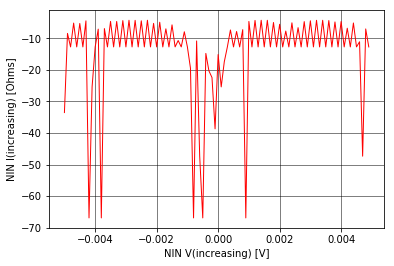

In [147]:
NINparams = [1.0333333333333332, 0.0005]

#plt.scatter(NIN_Vinc, NIN_Iinc)
err = NIN_Vinc_err/NINparams[0]
#plt.plot(NIN_Iinc, (NIN_Vinc-(NINcurr(NIN_Vinc, NINparams)*NINparams[0])), color='r', linewidth=1)
plt.plot(NIN_Iinc, (NIN_Vinc-(NINcurr(NIN_Vinc, NINparams)*NINparams[0]))/err, color='r', linewidth=1)

plt.grid(color='k', linestyle='-', linewidth=0.5)
#plt.xlim(-0.01, 0.01)
#plt.ylim(-0.05, 0.05)
plt.xlabel('NIN V(increasing) [mV]')
plt.ylabel('NIN I(increasing) [Ohms]')

print(str(bitch_err(NIN_Iinc, NINcurr(NIN_Vinc, NINparams), NIN_Vinc_err, 2)))
#print(str(bitch(NIN_Vinc, NINcurr(NIN_Vinc, NINparams)*NINparams[0], 2)))

chisq test: 0.06504244044792135
chisq bitch: 1.995920736652986e-05
progress: 1/2640
surpassed scoreboard:1.995920736652986e-05
coords: [0, 0, 0]
chisq test: 0.065158843475128
chisq bitch: 1.8072861873774033e-05
progress: 2/2640
surpassed scoreboard:1.8072861873774033e-05
coords: [0, 0, 1]
chisq test: 0.06526458803844498
chisq bitch: 1.644190112743938e-05
progress: 3/2640
surpassed scoreboard:1.644190112743938e-05
coords: [0, 0, 2]
chisq test: 0.06536106821156129
chisq bitch: 1.5022299721451759e-05
progress: 4/2640
surpassed scoreboard:1.5022299721451759e-05
coords: [0, 0, 3]
chisq test: 0.0654494408689536
chisq bitch: 1.3779178115161708e-05
progress: 5/2640
surpassed scoreboard:1.3779178115161708e-05
coords: [0, 0, 4]
chisq test: 0.06553067169455738
chisq bitch: 1.2684639087165061e-05
progress: 6/2640
surpassed scoreboard:1.2684639087165061e-05
coords: [0, 0, 5]
chisq test: 0.06560557004477217
chisq bitch: 1.1716185571922169e-05
progress: 7/2640
surpassed scoreboard:1.1716185571922169e

chisq test: 0.06529259973338811
chisq bitch: 1.6023017777230475e-05
progress: 83/2640
chisq test: 0.06538788639860862
chisq bitch: 1.4639281702737329e-05
progress: 84/2640
chisq test: 0.06547516300887468
chisq bitch: 1.3427605789468385e-05
progress: 85/2640
chisq test: 0.06555538378549818
chisq bitch: 1.2360787801146572e-05
progress: 86/2640
chisq test: 0.06562934834918921
chisq bitch: 1.1416892979307119e-05
progress: 87/2640
chisq test: 0.06569772801316638
chisq bitch: 1.057811054743702e-05
progress: 88/2640
chisq test: 0.0657610859734898
chisq bitch: 9.829895975616032e-06
progress: 89/2640
chisq test: 0.06581989291653557
chisq bitch: 9.16031996198839e-06
progress: 90/2640
chisq test: 0.06587453917906023
chisq bitch: 8.559568644310164e-06
progress: 91/2640
chisq test: 0.06592534431955535
chisq bitch: 8.019555642896357e-06
progress: 92/2640
chisq test: 0.06597256475574818
chisq bitch: 7.5336177041623584e-06
progress: 93/2640
chisq test: 0.06601639996974618
chisq bitch: 7.09627358275412

chisq test: 0.06608068748298179
chisq bitch: 6.478803354110877e-06
progress: 175/2640
chisq test: 0.06611747908505833
chisq bitch: 6.1382114200139314e-06
progress: 176/2640
surpassed scoreboard:6.1382114200139314e-06
coords: [0, 10, 15]
chisq test: 0.06512219897145718
chisq bitch: 1.8656404767302757e-05
progress: 177/2640
chisq test: 0.06523488668635298
chisq bitch: 1.689207205647921e-05
progress: 178/2640
chisq test: 0.06533724632267178
chisq bitch: 1.536675151759383e-05
progress: 179/2640
chisq test: 0.06543062979980413
chisq bitch: 1.4039218477542095e-05
progress: 180/2640
chisq test: 0.06551615870812645
chisq bitch: 1.2876818185052312e-05
progress: 181/2640
chisq test: 0.06559476897322937
chisq bitch: 1.1853437913035464e-05
progress: 182/2640
chisq test: 0.06566724467778486
chisq bitch: 1.0948024351560198e-05
progress: 183/2640
chisq test: 0.06573424385358884
chisq bitch: 1.0143485312986224e-05
progress: 184/2640
chisq test: 0.06579631827604122
chisq bitch: 9.42586601357606e-06
pro

chisq test: 0.06042043818346707
chisq bitch: 8.744339635619509e-06
progress: 267/2640
chisq test: 0.060468313128222324
chisq bitch: 8.192642092602402e-06
progress: 268/2640
chisq test: 0.06051281517104442
chisq bitch: 7.696142573961669e-06
progress: 269/2640
chisq test: 0.06055413299608749
chisq bitch: 7.24923626766223e-06
progress: 270/2640
chisq test: 0.06059240670080181
chisq bitch: 6.847327634937788e-06
progress: 271/2640
chisq test: 0.060627731941109334
chisq bitch: 6.486672304149358e-06
progress: 272/2640
chisq test: 0.05967097786297182
chisq bitch: 1.9773291273646958e-05
progress: 273/2640
chisq test: 0.05977900639358239
chisq bitch: 1.790435389686274e-05
progress: 274/2640
chisq test: 0.05987714442470785
chisq bitch: 1.628846579514098e-05
progress: 275/2640
chisq test: 0.05996668540936656
chisq bitch: 1.4882001000608375e-05
progress: 276/2640
chisq test: 0.06004870273105274
chisq bitch: 1.3650397288057022e-05
progress: 277/2640
chisq test: 0.06012409237675532
chisq bitch: 1.256

chisq test: 0.06039496061741238
chisq bitch: 9.045368259825587e-06
progress: 362/2640
chisq test: 0.06044559670344323
chisq bitch: 8.45214888579987e-06
progress: 363/2640
chisq test: 0.060492671946533474
chisq bitch: 7.918928965761968e-06
progress: 364/2640
chisq test: 0.06053642345764617
chisq bitch: 7.439131000039988e-06
progress: 365/2640
chisq test: 0.06057703549842437
chisq bitch: 7.007345562693157e-06
progress: 366/2640
chisq test: 0.06061464425318316
chisq bitch: 6.6191410430049846e-06
progress: 367/2640
chisq test: 0.0606493419022905
chisq bitch: 6.2709107433005435e-06
progress: 368/2640
chisq test: 0.059710466864573514
chisq bitch: 1.907914010229314e-05
progress: 369/2640
chisq test: 0.059816657078728644
chisq bitch: 1.7275209828392427e-05
progress: 370/2640
chisq test: 0.05991312016211782
chisq bitch: 1.571560608502996e-05
progress: 371/2640
chisq test: 0.06000112873671497
chisq bitch: 1.435819497912087e-05
progress: 372/2640
chisq test: 0.06008173874772325
chisq bitch: 1.316

chisq test: 0.060376334929639716
chisq bitch: 9.268708780964442e-06
progress: 457/2640
chisq test: 0.060429609795581415
chisq bitch: 8.63723891955049e-06
progress: 458/2640
chisq test: 0.06047910798684553
chisq bitch: 8.070763059250315e-06
progress: 459/2640
chisq test: 0.06052511757761371
chisq bitch: 7.561661869105202e-06
progress: 460/2640
chisq test: 0.06056786898572896
chisq bitch: 7.103662252015724e-06
progress: 461/2640
chisq test: 0.06060754057471401
chisq bitch: 6.69160965727976e-06
progress: 462/2640
chisq test: 0.06064426331038268
chisq bitch: 6.321286224250206e-06
progress: 463/2640
chisq test: 0.060678124738393895
chisq bitch: 5.989264681281989e-06
progress: 464/2640
chisq test: 0.05976247763099709
chisq bitch: 1.818418296605404e-05
progress: 465/2640
chisq test: 0.05986624501575564
chisq bitch: 1.6464091005057033e-05
progress: 466/2640
chisq test: 0.05996050072351318
chisq bitch: 1.4977072687156169e-05
progress: 467/2640
chisq test: 0.060046489886119124
chisq bitch: 1.368

chisq test: 0.05531591675399284
chisq bitch: 1.0639816898513533e-05
progress: 552/2640
chisq test: 0.05537116447686714
chisq bitch: 9.887258989062803e-06
progress: 553/2640
chisq test: 0.05542244580850647
chisq bitch: 9.213788309320004e-06
progress: 554/2640
chisq test: 0.055470100901070844
chisq bitch: 8.609533677290926e-06
progress: 555/2640
chisq test: 0.055514408282552996
chisq bitch: 8.066360972556339e-06
progress: 556/2640
chisq test: 0.055555591505776374
chisq bitch: 7.5775670517239465e-06
progress: 557/2640
chisq test: 0.055593824550950736
chisq bitch: 7.137637258881967e-06
progress: 558/2640
chisq test: 0.05562923631572402
chisq bitch: 6.7420517029753395e-06
progress: 559/2640
chisq test: 0.05566191444718135
chisq bitch: 6.3871295518837005e-06
progress: 560/2640
chisq test: 0.054777403892517514
chisq bitch: 1.9451644483122987e-05
progress: 561/2640
chisq test: 0.054877346579598425
chisq bitch: 1.7612827128029073e-05
progress: 562/2640
chisq test: 0.054968139306184
chisq bitch:

chisq test: 0.05528774430293221
chisq bitch: 1.1034364828964974e-05
progress: 647/2640
chisq test: 0.05534622383599299
chisq bitch: 1.0223519442673613e-05
progress: 648/2640
chisq test: 0.05540040718539189
chisq bitch: 9.500265744789171e-06
progress: 649/2640
chisq test: 0.05545069628509268
chisq bitch: 8.853071575222333e-06
progress: 650/2640
chisq test: 0.05549742418127605
chisq bitch: 8.272452488985537e-06
progress: 651/2640
chisq test: 0.055540863194371376
chisq bitch: 7.750596442629307e-06
progress: 652/2640
chisq test: 0.05558123142973297
chisq bitch: 7.281069373026768e-06
progress: 653/2640
chisq test: 0.05561869806664699
chisq bitch: 6.858581965769502e-06
progress: 654/2640
chisq test: 0.05565338775460126
chisq bitch: 6.478803354110888e-06
progress: 655/2640
chisq test: 0.05568538436738684
chisq bitch: 6.138211420013954e-06
progress: 656/2640
chisq test: 0.05482000726625226
chisq bitch: 1.8656404767302784e-05
progress: 657/2640
chisq test: 0.054917967150143666
chisq bitch: 1.68

chisq test: 0.05060219205298933
chisq bitch: 1.3716770522742499e-05
progress: 741/2640
chisq test: 0.05066791919043246
chisq bitch: 1.2627151941849549e-05
progress: 742/2640
chisq test: 0.05072852546324143
chisq bitch: 1.166305760386446e-05
progress: 743/2640
chisq test: 0.05078456006098133
chisq bitch: 1.08062996474691e-05
progress: 744/2640
chisq test: 0.050836483874817796
chisq bitch: 1.0042024040239058e-05
progress: 745/2640
chisq test: 0.05088468224844613
chisq bitch: 9.35804597665367e-06
progress: 746/2640
chisq test: 0.050929474916438774
chisq bitch: 8.74433963561951e-06
progress: 747/2640
chisq test: 0.05097112382972044
chisq bitch: 8.192642092602406e-06
progress: 748/2640
chisq test: 0.05100983940188417
chisq bitch: 7.696142573961665e-06
progress: 749/2640
chisq test: 0.05104578558516464
chisq bitch: 7.2492362676622395e-06
progress: 750/2640
chisq test: 0.051079084089084334
chisq bitch: 6.847327634937795e-06
progress: 751/2640
chisq test: 0.05110981798032245
chisq bitch: 6.486

chisq test: 0.05055909738926726
chisq bitch: 1.4456125872653111e-05
progress: 836/2640
chisq test: 0.050629439935076015
chisq bitch: 1.3259488853255944e-05
progress: 837/2640
chisq test: 0.050694098486668525
chisq bitch: 1.2205928209840306e-05
progress: 838/2640
chisq test: 0.05075371674986885
chisq bitch: 1.127377816111623e-05
progress: 839/2640
chisq test: 0.05080883513230867
chisq bitch: 1.0445447218476276e-05
progress: 840/2640
chisq test: 0.05085990697126728
chisq bitch: 9.706570829427694e-06
progress: 841/2640
chisq test: 0.05090731107671722
chisq bitch: 9.045368259825572e-06
progress: 842/2640
chisq test: 0.0509513615025445
chisq bitch: 8.452148885799868e-06
progress: 843/2640
chisq test: 0.05099231523664882
chisq bitch: 7.918928965761968e-06
progress: 844/2640
chisq test: 0.05103037833683395
chisq bitch: 7.439131000039977e-06
progress: 845/2640
chisq test: 0.05106571091611973
chisq bitch: 7.007345562693161e-06
progress: 846/2640
chisq test: 0.051098431286500615
chisq bitch: 6.6

chisq test: 0.050521829850942876
chisq bitch: 1.5111459123367595e-05
progress: 931/2640
chisq test: 0.05059694175447162
chisq bitch: 1.3805793762658603e-05
progress: 932/2640
chisq test: 0.050665738823071745
chisq bitch: 1.2662565269357875e-05
progress: 933/2640
chisq test: 0.05072897306085942
chisq bitch: 1.1656084970971445e-05
progress: 934/2640
chisq test: 0.050787274467908816
chisq bitch: 1.0765642609503132e-05
progress: 935/2640
chisq test: 0.050841171733870996
chisq bitch: 9.974425645108447e-06
progress: 936/2640
chisq test: 0.05089110811754401
chisq bitch: 9.268708780964442e-06
progress: 937/2640
chisq test: 0.050937453712236624
chisq bitch: 8.637238919550484e-06
progress: 938/2640
chisq test: 0.050980514993778175
chisq bitch: 8.070763059250312e-06
progress: 939/2640
chisq test: 0.051020542329836445
chisq bitch: 7.561661869105195e-06
progress: 940/2640
chisq test: 0.051057735968359275
chisq bitch: 7.1036622520157185e-06
progress: 941/2640
chisq test: 0.051092250901841905
chisq b

chisq test: 0.04627972384003286
chisq bitch: 1.7715149158446383e-05
progress: 1026/2640
chisq test: 0.046358924044419644
chisq bitch: 1.611618616873279e-05
progress: 1027/2640
chisq test: 0.04643119062836249
chisq bitch: 1.4724472359165232e-05
progress: 1028/2640
chisq test: 0.04649738869815195
chisq bitch: 1.3505801864046473e-05
progress: 1029/2640
chisq test: 0.04655824044540646
chisq bitch: 1.2432817839354504e-05
progress: 1030/2640
chisq test: 0.04661435116752625
chisq bitch: 1.1483460437438936e-05
progress: 1031/2640
chisq test: 0.04666622912506605
chisq bitch: 1.0639816898513516e-05
progress: 1032/2640
chisq test: 0.04671430079344857
chisq bitch: 9.88725898906279e-06
progress: 1033/2640
chisq test: 0.046758922655093405
chisq bitch: 9.213788309320009e-06
progress: 1034/2640
chisq test: 0.04680039038849011
chisq bitch: 8.609533677290916e-06
progress: 1035/2640
chisq test: 0.04683894610223402
chisq bitch: 8.06636097255633e-06
progress: 1036/2640
chisq test: 0.046874784108390674
chis

chisq test: 0.04698392668436293
chisq bitch: 6.184262122107048e-06
progress: 1120/2640
chisq test: 0.046227918682415554
chisq bitch: 1.8802854370083518e-05
progress: 1121/2640
chisq test: 0.04631345084094055
chisq bitch: 1.702480300533065e-05
progress: 1122/2640
chisq test: 0.04639115288835556
chisq bitch: 1.548760507842638e-05
progress: 1123/2640
chisq test: 0.04646204861431713
chisq bitch: 1.4149720884120846e-05
progress: 1124/2640
chisq test: 0.04652698757507296
chisq bitch: 1.297824543709852e-05
progress: 1125/2640
chisq test: 0.046586678841994696
chisq bitch: 1.1946865310803942e-05
progress: 1126/2640
chisq test: 0.046641716565204584
chisq bitch: 1.1034364828964952e-05
progress: 1127/2640
chisq test: 0.04669259947324536
chisq bitch: 1.022351944267361e-05
progress: 1128/2640
chisq test: 0.04673974584202156
chisq bitch: 9.500265744789161e-06
progress: 1129/2640
chisq test: 0.04678350506142058
chisq bitch: 8.853071575222345e-06
progress: 1130/2640
chisq test: 0.04682416664307628
chis

chisq test: 0.04310719899599678
chisq bitch: 7.282249464183921e-06
progress: 1214/2640
chisq test: 0.04313624787977739
chisq bitch: 6.878470170285243e-06
progress: 1215/2640
chisq test: 0.043163061440325216
chisq bitch: 6.516118610022704e-06
progress: 1216/2640
chisq test: 0.04243707309440722
chisq bitch: 1.986911242259423e-05
progress: 1217/2640
chisq test: 0.04251898549586956
chisq bitch: 1.7991202752927438e-05
progress: 1218/2640
chisq test: 0.04259340754215462
chisq bitch: 1.6367546099878874e-05
progress: 1219/2640
chisq test: 0.04266131764292323
chisq bitch: 1.4954310615357557e-05
progress: 1220/2640
chisq test: 0.04272352792779408
chisq bitch: 1.3716770522742513e-05
progress: 1221/2640
chisq test: 0.04278071644925362
chisq bitch: 1.2627151941849569e-05
progress: 1222/2640
chisq test: 0.04283345159053565
chisq bitch: 1.1663057603864468e-05
progress: 1223/2640
chisq test: 0.04288221069670633
chisq bitch: 1.0806299647469107e-05
progress: 1224/2640
chisq test: 0.04292739438806355
chi

chisq test: 0.043059513895229745
chisq bitch: 7.970408555584102e-06
progress: 1308/2640
chisq test: 0.04309274800297019
chisq bitch: 7.4874694585085466e-06
progress: 1309/2640
chisq test: 0.043123600064750495
chisq bitch: 7.052840296834011e-06
progress: 1310/2640
chisq test: 0.04315217344587008
chisq bitch: 6.662058639233141e-06
progress: 1311/2640
chisq test: 0.043178538167165076
chisq bitch: 6.311491908014212e-06
progress: 1312/2640
chisq test: 0.0424653995187045
chisq bitch: 1.9208922699081694e-05
progress: 1313/2640
chisq test: 0.04254599661048826
chisq bitch: 1.7392837007644074e-05
progress: 1314/2640
chisq test: 0.04261921993443489
chisq bitch: 1.582270904721083e-05
progress: 1315/2640
chisq test: 0.04268603307320613
chisq bitch: 1.445612587265311e-05
progress: 1316/2640
chisq test: 0.04274723573775607
chisq bitch: 1.3259488853255964e-05
progress: 1317/2640
chisq test: 0.04280349550051147
chisq bitch: 1.2205928209840318e-05
progress: 1318/2640
chisq test: 0.04285537183912009
chis

chisq test: 0.04301042511723283
chisq bitch: 8.71177478204876e-06
progress: 1402/2640
chisq test: 0.04304805902678986
chisq bitch: 8.14041459777123e-06
progress: 1403/2640
chisq test: 0.04308304346439306
chisq bitch: 7.626908620589018e-06
progress: 1404/2640
chisq test: 0.043115553432003954
chisq bitch: 7.164928168491916e-06
progress: 1405/2640
chisq test: 0.04314572446520704
chisq bitch: 6.74927215732941e-06
progress: 1406/2640
chisq test: 0.043173656161342874
chisq bitch: 6.375683709176024e-06
progress: 1407/2640
chisq test: 0.043199415193736074
chisq bitch: 6.040702808458806e-06
progress: 1408/2640
chisq test: 0.042503140376101235
chisq bitch: 1.83470375299184e-05
progress: 1409/2640
chisq test: 0.04258198381791989
chisq bitch: 1.661168737429775e-05
progress: 1410/2640
chisq test: 0.042653609038185596
chisq bitch: 1.51114591233676e-05
progress: 1411/2640
chisq test: 0.04271895982462649
chisq bitch: 1.3805793762658603e-05
progress: 1412/2640
chisq test: 0.04277881931070401
chisq bitc

chisq test: 0.039437711928579415
chisq bitch: 1.0698424229658037e-05
progress: 1496/2640
chisq test: 0.0394796531080868
chisq bitch: 9.941741217707546e-06
progress: 1497/2640
chisq test: 0.039518586253018434
chisq bitch: 9.26457153751674e-06
progress: 1498/2640
chisq test: 0.03955476910541294
chisq bitch: 8.656989567664072e-06
progress: 1499/2640
chisq test: 0.039588412748777765
chisq bitch: 8.110815844555525e-06
progress: 1500/2640
chisq test: 0.03961968663444461
chisq bitch: 7.619309336806042e-06
progress: 1501/2640
chisq test: 0.03964872266643594
chisq bitch: 7.17692365309484e-06
progress: 1502/2640
chisq test: 0.03967561859713365
chisq bitch: 6.779112275368808e-06
progress: 1503/2640
chisq test: 0.039700440926057096
chisq bitch: 6.422172007834192e-06
progress: 1504/2640
chisq test: 0.03902881626854649
chisq bitch: 1.95645387003422e-05
progress: 1505/2640
chisq test: 0.03910464577341794
chisq bitch: 1.7715149158446362e-05
progress: 1506/2640
chisq test: 0.03917354184830535
chisq bit

chisq test: 0.03936707281391005
chisq bitch: 1.2036767877427924e-05
progress: 1590/2640
chisq test: 0.039415134795312175
chisq bitch: 1.1117448142134708e-05
progress: 1591/2640
chisq test: 0.0394595708480931
chisq bitch: 1.0300534548834667e-05
progress: 1592/2640
chisq test: 0.03950074585166626
chisq bitch: 9.571859174950103e-06
progress: 1593/2640
chisq test: 0.03953896464458707
chisq bitch: 8.919803592534006e-06
progress: 1594/2640
chisq test: 0.03957447987329419
chisq bitch: 8.334811804284723e-06
progress: 1595/2640
chisq test: 0.03960749816833938
chisq bitch: 7.809012182975197e-06
progress: 1596/2640
chisq test: 0.03963818507197613
chisq bitch: 7.33592089164463e-06
progress: 1597/2640
chisq test: 0.039666669041914744
chisq bitch: 6.910206938554653e-06
progress: 1598/2640
chisq test: 0.03969304477997735
chisq bitch: 6.527504502520297e-06
progress: 1599/2640
chisq test: 0.03971737607519574
chisq bitch: 6.184262122107059e-06
progress: 1600/2640
chisq test: 0.03905958287318793
chisq bi

chisq test: 0.036081155830445924
chisq bitch: 1.5022299721451743e-05
progress: 1684/2640
chisq test: 0.036135383134130575
chisq bitch: 1.377917811516168e-05
progress: 1685/2640
chisq test: 0.03618523596678153
chisq bitch: 1.2684639087165066e-05
progress: 1686/2640
chisq test: 0.03623120914034794
chisq bitch: 1.1716185571922169e-05
progress: 1687/2640
chisq test: 0.03627371826230506
chisq bitch: 1.0855548341218845e-05
progress: 1688/2640
chisq test: 0.03631311217963438
chisq bitch: 1.0087806576026946e-05
progress: 1689/2640
chisq test: 0.0363496826039378
chisq bitch: 9.400720333916506e-06
progress: 1690/2640
chisq test: 0.03638367161477416
chisq bitch: 8.7842180511051e-06
progress: 1691/2640
chisq test: 0.03641527756877223
chisq bitch: 8.229998700332604e-06
progress: 1692/2640
chisq test: 0.03644465981709699
chisq bitch: 7.73121966669458e-06
progress: 1693/2640
chisq test: 0.03647194253977044
chisq bitch: 7.282249464183935e-06
progress: 1694/2640
chisq test: 0.03649721793314036
chisq bi

chisq test: 0.03597931575783081
chisq bitch: 1.7505383131407272e-05
progress: 1778/2640
chisq test: 0.03604319482064397
chisq bitch: 1.5925186028251628e-05
progress: 1779/2640
chisq test: 0.03610148581870769
chisq bitch: 1.454982733250863e-05
progress: 1780/2640
chisq test: 0.03615488540906829
chisq bitch: 1.3345496352013534e-05
progress: 1781/2640
chisq test: 0.03620397522047709
chisq bitch: 1.2285153214564452e-05
progress: 1782/2640
chisq test: 0.036249242769408455
chisq bitch: 1.1346994524622409e-05
progress: 1783/2640
chisq test: 0.03629109742246158
chisq bitch: 1.0513316602241418e-05
progress: 1784/2640
chisq test: 0.03632988265612415
chisq bitch: 9.769662816322672e-06
progress: 1785/2640
chisq test: 0.03636588553488534
chisq bitch: 9.104176424547702e-06
progress: 1786/2640
chisq test: 0.036399344096319564
chisq bitch: 8.50710375438863e-06
progress: 1787/2640
chisq test: 0.03643045316435882
chisq bitch: 7.970408555584102e-06
progress: 1788/2640
chisq test: 0.03645936898854433
chis

chisq test: 0.03654882048771271
chisq bitch: 6.090355107190464e-06
progress: 1872/2640
chisq test: 0.035940442973316396
chisq bitch: 1.8504455589055215e-05
progress: 1873/2640
chisq test: 0.036009291091157365
chisq bitch: 1.6754357540156233e-05
progress: 1874/2640
chisq test: 0.03607184100201854
chisq bitch: 1.5241361032192698e-05
progress: 1875/2640
chisq test: 0.03612891558250435
chisq bitch: 1.3924568308856927e-05
progress: 1876/2640
chisq test: 0.03618119774398325
chisq bitch: 1.2771584288989415e-05
progress: 1877/2640
chisq test: 0.03622925751323136
chisq bitch: 1.1756504509777161e-05
progress: 1878/2640
chisq test: 0.03627357254616069
chisq bitch: 1.085844414461988e-05
progress: 1879/2640
chisq test: 0.036314543775043555
chisq bitch: 1.0060448350961982e-05
progress: 1880/2640
chisq test: 0.036352507418997204
chisq bitch: 9.348675055778723e-06
progress: 1881/2640
chisq test: 0.03638774426320679
chisq bitch: 8.711774782048758e-06
progress: 1882/2640
chisq test: 0.036420486884036686

chisq test: 0.03357601300946109
chisq bitch: 7.214125568073902e-06
progress: 1966/2640
chisq test: 0.03359946845875683
chisq bitch: 6.814206364976868e-06
progress: 1967/2640
chisq test: 0.0336211174176971
chisq bitch: 6.4553549138741874e-06
progress: 1968/2640
chisq test: 0.03303544476250766
chisq bitch: 1.9671760704320985e-05
progress: 1969/2640
chisq test: 0.033101532101154414
chisq bitch: 1.7812330577334974e-05
progress: 1970/2640
chisq test: 0.03316158163335813
chisq bitch: 1.620467416744859e-05
progress: 1971/2640
chisq test: 0.03321638131376974
chisq bitch: 1.4805383677000564e-05
progress: 1972/2640
chisq test: 0.03326658528520641
chisq bitch: 1.35800701936821e-05
progress: 1973/2640
chisq test: 0.033312739762702465
chisq bitch: 1.250123004776895e-05
progress: 1974/2640
chisq test: 0.03335530265454134
chisq bitch: 1.154668459721801e-05
progress: 1975/2640
chisq test: 0.03339465854039616
chisq bitch: 1.0698424229658057e-05
progress: 1976/2640
chisq test: 0.03343113017842357
chisq 

chisq test: 0.033539201687705904
chisq bitch: 7.86512670152228e-06
progress: 2060/2640
chisq test: 0.03356598660159148
chisq bitch: 7.388611551632911e-06
progress: 2061/2640
chisq test: 0.033590850590745416
chisq bitch: 6.959798047047359e-06
progress: 2062/2640
chisq test: 0.0336138763613828
chisq bitch: 6.574286782774824e-06
progress: 2063/2640
chisq test: 0.03363511969670892
chisq bitch: 6.228498101969328e-06
progress: 2064/2640
chisq test: 0.03306092043780663
chisq bitch: 1.894377532099384e-05
progress: 2065/2640
chisq test: 0.033125827262148154
chisq bitch: 1.715252393947464e-05
progress: 2066/2640
chisq test: 0.03318480069979921
chisq bitch: 1.5603897556028398e-05
progress: 2067/2640
chisq test: 0.03323861545426102
chisq bitch: 1.4256053374308522e-05
progress: 2068/2640
chisq test: 0.033287914564766305
chisq bitch: 1.3075845656283957e-05
progress: 2069/2640
chisq test: 0.03333323487238719
chisq bitch: 1.2036767877427963e-05
progress: 2070/2640
chisq test: 0.03337502631685686
chisq

chisq test: 0.033501573037721055
chisq bitch: 8.560132017213165e-06
progress: 2154/2640
chisq test: 0.033531842044919595
chisq bitch: 7.998709058995833e-06
progress: 2155/2640
chisq test: 0.03355997958245419
chisq bitch: 7.4941646073575904e-06
progress: 2156/2640
chisq test: 0.033586125804857425
chisq bitch: 7.040283063726643e-06
progress: 2157/2640
chisq test: 0.0336103890713689
chisq bitch: 6.6319580091769535e-06
progress: 2158/2640
chisq test: 0.033632848771853206
chisq bitch: 6.265011936729609e-06
progress: 2159/2640
chisq test: 0.03365355774243751
chisq bitch: 5.936051436344313e-06
progress: 2160/2640
chisq test: 0.03040955112546465
chisq bitch: 1.9959207366529885e-05
progress: 2161/2640
chisq test: 0.03047156502375797
chisq bitch: 1.8072861873774022e-05
progress: 2162/2640
chisq test: 0.030527916802322665
chisq bitch: 1.6441901127439426e-05
progress: 2163/2640
chisq test: 0.030579344956368947
chisq bitch: 1.5022299721451735e-05
progress: 2164/2640
chisq test: 0.030626462651843704

chisq test: 0.03075889915610016
chisq bitch: 1.057811054743701e-05
progress: 2248/2640
chisq test: 0.030792707764836072
chisq bitch: 9.829895975615991e-06
progress: 2249/2640
chisq test: 0.03082409276800484
chisq bitch: 9.160319961988376e-06
progress: 2250/2640
chisq test: 0.030853261434628285
chisq bitch: 8.559568644310147e-06
progress: 2251/2640
chisq test: 0.030880383440206077
chisq bitch: 8.019555642896357e-06
progress: 2252/2640
chisq test: 0.030905594900226485
chisq bitch: 7.5336177041623856e-06
progress: 2253/2640
chisq test: 0.030929001648433103
chisq bitch: 7.096273582754107e-06
progress: 2254/2640
chisq test: 0.03095068196268517
chisq bitch: 6.703031418482328e-06
progress: 2255/2640
chisq test: 0.030970688893055254
chisq bitch: 6.350233920328578e-06
progress: 2256/2640
chisq test: 0.030429787475916015
chisq bitch: 1.9333098546978123e-05
progress: 2257/2640
chisq test: 0.030490864753693333
chisq bitch: 1.7505383131407292e-05
progress: 2258/2640
chisq test: 0.030546362658644504

chisq test: 0.030703970583258577
chisq bitch: 1.1853437913035444e-05
progress: 2342/2640
chisq test: 0.03074263483349035
chisq bitch: 1.0948024351560205e-05
progress: 2343/2640
chisq test: 0.030778383829050515
chisq bitch: 1.0143485312986166e-05
progress: 2344/2640
chisq test: 0.03081151054688909
chisq bitch: 9.425866013576035e-06
progress: 2345/2640
chisq test: 0.03084225970590836
chisq bitch: 8.783723949337387e-06
progress: 2346/2640
chisq test: 0.030870834053960735
chisq bitch: 8.207649035293381e-06
progress: 2347/2640
chisq test: 0.0308973993143963
chisq bitch: 7.689891147152672e-06
progress: 2348/2640
chisq test: 0.030922088132245642
chisq bitch: 7.224067943732902e-06
progress: 2349/2640
chisq test: 0.0309450032807469
chisq bitch: 6.80493341631389e-06
progress: 2350/2640
chisq test: 0.030966220327918185
chisq bitch: 6.4281930153422796e-06
progress: 2351/2640
chisq test: 0.030985789915383113
chisq bitch: 6.09035510719046e-06
progress: 2352/2640
chisq test: 0.030457094214676277
chis

chisq test: 0.028180103171726992
chisq bitch: 1.488200100060834e-05
progress: 2436/2640
chisq test: 0.02822379923295951
chisq bitch: 1.3650397288057058e-05
progress: 2437/2640
chisq test: 0.028263973532116772
chisq bitch: 1.2566011968199475e-05
progress: 2438/2640
chisq test: 0.02830102400211732
chisq bitch: 1.1606553919120948e-05
progress: 2439/2640
chisq test: 0.028335284899269026
chisq bitch: 1.0753921822858206e-05
progress: 2440/2640
chisq test: 0.028367036786879716
chisq bitch: 9.993332681488534e-06
progress: 2441/2640
chisq test: 0.028396514257219743
chisq bitch: 9.312660332344631e-06
progress: 2442/2640
chisq test: 0.02842391195096478
chisq bitch: 8.701927604611216e-06
progress: 2443/2640
chisq test: 0.028449389297485857
chisq bitch: 8.152912097395491e-06
progress: 2444/2640
chisq test: 0.028473074299209943
chisq bitch: 7.65883690032176e-06
progress: 2445/2640
chisq test: 0.02849506660784606
chisq bitch: 7.214125568073912e-06
progress: 2446/2640
chisq test: 0.028515440082334458


chisq test: 0.028100200370208894
chisq bitch: 1.7275209828392427e-05
progress: 2530/2640
chisq test: 0.028151571119437162
chisq bitch: 1.571560608502999e-05
progress: 2531/2640
chisq test: 0.028198452169639968
chisq bitch: 1.4358194979120854e-05
progress: 2532/2640
chisq test: 0.02824140269747829
chisq bitch: 1.3169599544032039e-05
progress: 2533/2640
chisq test: 0.028280889610068163
chisq bitch: 1.2123127793443519e-05
progress: 2534/2640
chisq test: 0.02831730429670635
chisq bitch: 1.119725778780715e-05
progress: 2535/2640
chisq test: 0.028350975413798694
chisq bitch: 1.0374515304938839e-05
progress: 2536/2640
chisq test: 0.02838217870396523
chisq bitch: 9.64063203432466e-06
progress: 2537/2640
chisq test: 0.028411144586652767
chisq bitch: 8.983906684826042e-06
progress: 2538/2640
chisq test: 0.028438064071859677
chisq bitch: 8.394714528457704e-06
progress: 2539/2640
chisq test: 0.028463093414704124
chisq bitch: 7.865126701522309e-06
progress: 2540/2640
chisq test: 0.02848635782979886

chisq test: 0.028559480865581285
chisq bitch: 5.9892646812819685e-06
progress: 2624/2640
chisq test: 0.028071353939439818
chisq bitch: 1.8184182966054024e-05
progress: 2625/2640
chisq test: 0.028126606320760007
chisq bitch: 1.6464091005057016e-05
progress: 2626/2640
chisq test: 0.028176808689106575
chisq bitch: 1.4977072687156166e-05
progress: 2627/2640
chisq test: 0.028222620239658523
chisq bitch: 1.3682919501802646e-05
progress: 2628/2640
chisq test: 0.028264588119395098
chisq bitch: 1.2549783822251264e-05
progress: 2629/2640
chisq test: 0.02830316907740713
chisq bitch: 1.1552200251437918e-05
progress: 2630/2640
chisq test: 0.028338745866185813
chisq bitch: 1.0669639151754611e-05
progress: 2631/2640
chisq test: 0.028371639751808626
chisq bitch: 9.885435216047443e-06
progress: 2632/2640
chisq test: 0.028402120115610652
chisq bitch: 9.185983966150172e-06
progress: 2633/2640
chisq test: 0.028430411871218895
chisq bitch: 8.560132017213136e-06
progress: 2634/2640
chisq test: 0.02845670123

(-0.01, 0.01)

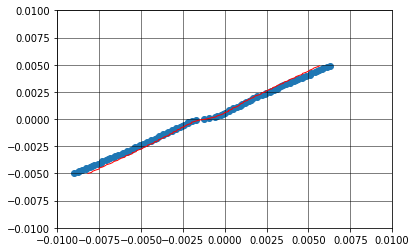

In [222]:
optim_R, optim_del, optim_T, data_square, coords = herbertSIN(SIN_Vinc, SIN_Iinc, SIN_Vinc_err, [1.0, 0.1, 0.0015, .0005, 0.36204, 0.1])

plt.scatter(SIN_Vinc, SIN_Iinc)
plt.plot(SINcurr(SIN_Vinc, [optim_R, optim_del, optim_T]), SIN_Iinc, color='r', linewidth=1)
plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.xlim(-0.01, 0.01)
plt.ylim(-0.01, 0.01)

In [ ]:
optim_R, optim_del, optim_T, data_cube, coords = herbertSIN(SIN_Vinc, SIN_Iinc, SIN_Vinc_err, [1.0, 0.1, 0.0015, .0005, 0.36204, 0.1])

plt.scatter(SIN_Vinc, SIN_Iinc)
plt.plot(SINcurr(SIN_Vinc, [optim_R, optim_del, optim_T]), SIN_Iinc, color='r', linewidth=1)
plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.xlim(-0.01, 0.01)
plt.ylim(-0.01, 0.01)

In [ ]:
SINparams = []

plt.scatter(SIN_Vinc, SIN_Iinc)
plt.plot(SINcurr(SIN_Vinc, [optim_R, optim_del, optim_T]), SIN_Iinc, color='r', linewidth=1)
plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.xlim(-0.01, 0.01)
plt.ylim(-0.01, 0.01)

In [79]:
#SIS_excluded = SIS

optim_R, optim_del_pb, optim_del_al, optim_T, data_cube, coords = herbertSIS(SIS_Vinc, SIS_Iinc, SIS_Vinc_err, [0.9, 0.1, 0.0018, .0003, 0.002, .0003, 0.462, 0.1])

plt.scatter(SIS_Vinc, SIS_Iinc)
plt.plot(SIScurr(SIS_Vinc, [optim_R, optim_del, optim_T])*optim_R, SIS_Iinc, color='r', linewidth=1)
plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.xlim(-0.01, 0.01)
plt.ylim(-0.01, 0.01)
print(str(chi_sq(SIN_Vinc, SINcurr(SIN_Vinc, params)*optim_R, 4)))

progress: 1/3875
surpassed scoreboard:4.250786995526286e-07
progress: 2/3875
surpassed scoreboard:4.0990593130756344e-07
progress: 3/3875
surpassed scoreboard:3.955540555050944e-07
progress: 4/3875
surpassed scoreboard:3.819695335187065e-07
progress: 5/3875
surpassed scoreboard:3.691038042235161e-07
progress: 6/3875
surpassed scoreboard:3.569128118551071e-07
progress: 7/3875
surpassed scoreboard:3.453565876745725e-07
progress: 8/3875
surpassed scoreboard:3.343988783888101e-07
progress: 9/3875
surpassed scoreboard:3.240068153091679e-07
progress: 10/3875
surpassed scoreboard:3.141506191395865e-07
progress: 11/3875
surpassed scoreboard:3.048033360531503e-07
progress: 12/3875
surpassed scoreboard:2.959406013712203e-07
progress: 13/3875
surpassed scoreboard:2.875404276722474e-07
progress: 14/3875
surpassed scoreboard:2.7958301470582863e-07
progress: 15/3875
surpassed scoreboard:2.7205057881895935e-07
progress: 16/3875
surpassed scoreboard:2.6492719998665413e-07
progress: 17/3875
surpassed s

progress: 344/3875
progress: 345/3875
progress: 346/3875
progress: 347/3875
progress: 348/3875
progress: 349/3875
progress: 350/3875
progress: 351/3875
progress: 352/3875
progress: 353/3875
progress: 354/3875
progress: 355/3875
progress: 356/3875
progress: 357/3875
progress: 358/3875
progress: 359/3875
progress: 360/3875
progress: 361/3875
progress: 362/3875
progress: 363/3875
progress: 364/3875
progress: 365/3875
progress: 366/3875
progress: 367/3875
progress: 368/3875
progress: 369/3875
progress: 370/3875
progress: 371/3875
progress: 372/3875
progress: 373/3875
progress: 374/3875
progress: 375/3875
progress: 376/3875
progress: 377/3875
progress: 378/3875
progress: 379/3875
progress: 380/3875
progress: 381/3875
progress: 382/3875
progress: 383/3875
progress: 384/3875
progress: 385/3875
progress: 386/3875
progress: 387/3875
progress: 388/3875
progress: 389/3875
progress: 390/3875
progress: 391/3875
progress: 392/3875
progress: 393/3875
progress: 394/3875
progress: 395/3875
progress: 39

progress: 767/3875
progress: 768/3875
progress: 769/3875
progress: 770/3875
progress: 771/3875
progress: 772/3875
progress: 773/3875
progress: 774/3875
surpassed scoreboard:1.7818906940954175e-07
progress: 775/3875
surpassed scoreboard:1.7664790068424136e-07
progress: 776/3875
progress: 777/3875
progress: 778/3875
progress: 779/3875
progress: 780/3875
progress: 781/3875
progress: 782/3875
progress: 783/3875
progress: 784/3875
progress: 785/3875
progress: 786/3875
progress: 787/3875
progress: 788/3875
progress: 789/3875
progress: 790/3875
progress: 791/3875
progress: 792/3875
progress: 793/3875
progress: 794/3875
progress: 795/3875
progress: 796/3875
progress: 797/3875
progress: 798/3875
progress: 799/3875
progress: 800/3875
progress: 801/3875
progress: 802/3875
progress: 803/3875
progress: 804/3875
progress: 805/3875
progress: 806/3875
progress: 807/3875
progress: 808/3875
progress: 809/3875
progress: 810/3875
progress: 811/3875
progress: 812/3875
progress: 813/3875
progress: 814/3875


progress: 1184/3875
progress: 1185/3875
progress: 1186/3875
progress: 1187/3875
progress: 1188/3875
progress: 1189/3875
progress: 1190/3875
progress: 1191/3875
progress: 1192/3875
progress: 1193/3875
progress: 1194/3875
progress: 1195/3875
progress: 1196/3875
progress: 1197/3875
progress: 1198/3875
progress: 1199/3875
progress: 1200/3875
progress: 1201/3875
progress: 1202/3875
progress: 1203/3875
progress: 1204/3875
progress: 1205/3875
progress: 1206/3875
progress: 1207/3875
progress: 1208/3875
progress: 1209/3875
progress: 1210/3875
progress: 1211/3875
progress: 1212/3875
progress: 1213/3875
progress: 1214/3875
progress: 1215/3875
progress: 1216/3875
progress: 1217/3875
progress: 1218/3875
progress: 1219/3875
progress: 1220/3875
progress: 1221/3875
progress: 1222/3875
progress: 1223/3875
progress: 1224/3875
progress: 1225/3875
progress: 1226/3875
progress: 1227/3875
progress: 1228/3875
progress: 1229/3875
progress: 1230/3875
progress: 1231/3875
progress: 1232/3875
progress: 1233/3875


progress: 1592/3875
progress: 1593/3875
progress: 1594/3875
progress: 1595/3875
progress: 1596/3875
progress: 1597/3875
progress: 1598/3875
progress: 1599/3875
progress: 1600/3875
progress: 1601/3875
progress: 1602/3875
progress: 1603/3875
progress: 1604/3875
progress: 1605/3875
progress: 1606/3875
progress: 1607/3875
progress: 1608/3875
progress: 1609/3875
progress: 1610/3875
progress: 1611/3875
progress: 1612/3875
progress: 1613/3875
progress: 1614/3875
progress: 1615/3875
progress: 1616/3875
progress: 1617/3875
progress: 1618/3875
progress: 1619/3875
progress: 1620/3875
progress: 1621/3875
progress: 1622/3875
progress: 1623/3875
progress: 1624/3875
progress: 1625/3875
progress: 1626/3875
progress: 1627/3875
progress: 1628/3875
progress: 1629/3875
progress: 1630/3875
progress: 1631/3875
progress: 1632/3875
progress: 1633/3875
progress: 1634/3875
progress: 1635/3875
progress: 1636/3875
progress: 1637/3875
progress: 1638/3875
progress: 1639/3875
progress: 1640/3875
progress: 1641/3875


progress: 2002/3875
progress: 2003/3875
progress: 2004/3875
progress: 2005/3875
progress: 2006/3875
progress: 2007/3875
progress: 2008/3875
progress: 2009/3875
progress: 2010/3875
progress: 2011/3875
progress: 2012/3875
progress: 2013/3875
progress: 2014/3875
progress: 2015/3875
progress: 2016/3875
progress: 2017/3875
progress: 2018/3875
progress: 2019/3875
progress: 2020/3875
progress: 2021/3875
progress: 2022/3875
progress: 2023/3875
progress: 2024/3875
progress: 2025/3875
progress: 2026/3875
progress: 2027/3875
progress: 2028/3875
progress: 2029/3875
progress: 2030/3875
progress: 2031/3875
progress: 2032/3875
progress: 2033/3875
progress: 2034/3875
progress: 2035/3875
progress: 2036/3875
progress: 2037/3875
progress: 2038/3875
progress: 2039/3875
progress: 2040/3875
progress: 2041/3875
progress: 2042/3875
progress: 2043/3875
progress: 2044/3875
progress: 2045/3875
progress: 2046/3875
progress: 2047/3875
progress: 2048/3875
progress: 2049/3875
progress: 2050/3875
progress: 2051/3875


progress: 2410/3875
progress: 2411/3875
progress: 2412/3875
progress: 2413/3875
progress: 2414/3875
progress: 2415/3875
progress: 2416/3875
progress: 2417/3875
progress: 2418/3875
progress: 2419/3875
progress: 2420/3875
progress: 2421/3875
progress: 2422/3875
progress: 2423/3875
progress: 2424/3875
progress: 2425/3875
progress: 2426/3875
progress: 2427/3875
progress: 2428/3875
progress: 2429/3875
progress: 2430/3875
progress: 2431/3875
progress: 2432/3875
progress: 2433/3875
progress: 2434/3875
progress: 2435/3875
progress: 2436/3875
progress: 2437/3875
progress: 2438/3875
progress: 2439/3875
progress: 2440/3875
progress: 2441/3875
progress: 2442/3875
progress: 2443/3875
progress: 2444/3875
progress: 2445/3875
progress: 2446/3875
progress: 2447/3875
progress: 2448/3875
progress: 2449/3875
progress: 2450/3875
progress: 2451/3875
progress: 2452/3875
progress: 2453/3875
progress: 2454/3875
progress: 2455/3875
progress: 2456/3875
progress: 2457/3875
progress: 2458/3875
progress: 2459/3875


progress: 2820/3875
progress: 2821/3875
progress: 2822/3875
progress: 2823/3875
progress: 2824/3875
progress: 2825/3875
progress: 2826/3875
progress: 2827/3875
progress: 2828/3875
progress: 2829/3875
progress: 2830/3875
progress: 2831/3875
progress: 2832/3875
progress: 2833/3875
progress: 2834/3875
progress: 2835/3875
progress: 2836/3875
progress: 2837/3875
progress: 2838/3875
progress: 2839/3875
progress: 2840/3875
progress: 2841/3875
progress: 2842/3875
progress: 2843/3875
progress: 2844/3875
progress: 2845/3875
progress: 2846/3875
progress: 2847/3875
progress: 2848/3875
progress: 2849/3875
progress: 2850/3875
progress: 2851/3875
progress: 2852/3875
progress: 2853/3875
progress: 2854/3875
progress: 2855/3875
progress: 2856/3875
progress: 2857/3875
progress: 2858/3875
progress: 2859/3875
progress: 2860/3875
progress: 2861/3875
progress: 2862/3875
progress: 2863/3875
progress: 2864/3875
progress: 2865/3875
progress: 2866/3875
progress: 2867/3875
progress: 2868/3875
progress: 2869/3875


progress: 3230/3875
progress: 3231/3875
progress: 3232/3875
progress: 3233/3875
progress: 3234/3875
progress: 3235/3875
progress: 3236/3875
progress: 3237/3875
progress: 3238/3875
progress: 3239/3875
progress: 3240/3875
progress: 3241/3875
progress: 3242/3875
progress: 3243/3875
progress: 3244/3875
progress: 3245/3875
progress: 3246/3875
progress: 3247/3875
progress: 3248/3875
progress: 3249/3875
progress: 3250/3875
progress: 3251/3875
progress: 3252/3875
progress: 3253/3875
progress: 3254/3875
progress: 3255/3875
progress: 3256/3875
progress: 3257/3875
progress: 3258/3875
progress: 3259/3875
progress: 3260/3875
progress: 3261/3875
progress: 3262/3875
progress: 3263/3875
progress: 3264/3875
progress: 3265/3875
progress: 3266/3875
progress: 3267/3875
progress: 3268/3875
progress: 3269/3875
progress: 3270/3875
progress: 3271/3875
progress: 3272/3875
progress: 3273/3875
progress: 3274/3875
progress: 3275/3875
progress: 3276/3875
progress: 3277/3875
progress: 3278/3875
progress: 3279/3875


progress: 3640/3875
progress: 3641/3875
progress: 3642/3875
progress: 3643/3875
progress: 3644/3875
progress: 3645/3875
progress: 3646/3875
progress: 3647/3875
progress: 3648/3875
progress: 3649/3875
progress: 3650/3875
progress: 3651/3875
progress: 3652/3875
progress: 3653/3875
progress: 3654/3875
progress: 3655/3875
progress: 3656/3875
progress: 3657/3875
progress: 3658/3875
progress: 3659/3875
progress: 3660/3875
progress: 3661/3875
progress: 3662/3875
progress: 3663/3875
progress: 3664/3875
progress: 3665/3875
progress: 3666/3875
progress: 3667/3875
progress: 3668/3875
progress: 3669/3875
progress: 3670/3875
progress: 3671/3875
progress: 3672/3875
progress: 3673/3875
progress: 3674/3875
progress: 3675/3875
progress: 3676/3875
progress: 3677/3875
progress: 3678/3875
progress: 3679/3875
progress: 3680/3875
progress: 3681/3875
progress: 3682/3875
progress: 3683/3875
progress: 3684/3875
progress: 3685/3875
progress: 3686/3875
progress: 3687/3875
progress: 3688/3875
progress: 3689/3875


ValueError: too many values to unpack

0.01766479006842411


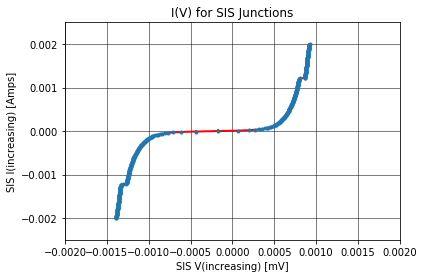

In [216]:
#plt.scatter(SIS_Vinc, SIS_Iinc)
plt.errorbar(SIS_Vinc, SIS_Iinc, yerr=SIS_Vinc_err, marker='.', elinewidth=2, linewidth=0)
#params = [1.0, 0.0015, 0.36204]
params = [0.8800000000000001, 0.0019799999999999996, 0.0021799999999999996, 0.5619999999999996]
#params = [0.9, 0.0018000000000000004, 0.46203999999999984]
#plt.plot(SIN_Vinc, SINcurr(SIN_Vinc, [130.0, 0.0015, 0.00036204]), color='r', linewidth=1)
plt.plot(SIScurr(SIS_Vinc, params)*params[0], SIS_Iinc, color='r', linewidth=2)
#plt.plot(SIN_Vinc, SINcurr(SIN_Vinc, params), color='r', linewidth=1)

plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.xlim(-0.002, 0.002)
#plt.xlim(0.005, 0.006)
#plt.ylim(-0.0025, 0)
plt.ylim(-0.0025, 0.0025)
#plt.ylim(0.0025, 0.005)

plt.xlabel('SIS V(increasing) [mV]')
plt.ylabel('SIS I(increasing) [Amps]')
plt.title('I(V) for SIS Junctions')


print(str(chi_sq(SIS_Vinc, SIScurr(SIS_Vinc, params)*params[0], 4)))

0.07574384836310244


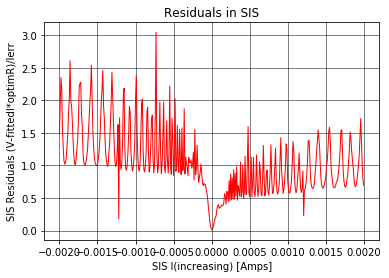

In [151]:
SISparams = [0.8800000000000001, 0.0019799999999999996, 0.0021799999999999996, 0.5619999999999996]

#plt.scatter(NIN_Vinc, NIN_Iinc)
SISerr = SIS_Vinc_err/SISparams[0]
plt.plot(SIS_Iinc, np.abs((SIS_Vinc-(SIScurr(SIS_Vinc, SISparams)*SISparams[0]))/SISerr), color='r', linewidth=1)
plt.grid(color='k', linestyle='-', linewidth=0.5)
#plt.xlim(-0.01, 0.01)
#plt.ylim(-0.05, 0.05)
plt.xlabel('SIS I(increasing) [Amps]')
plt.ylabel('SIS Residuals (V-fittedI*optimR)/Ierr')
plt.title('Residuals in SIS')

print(str(bitch_err(SIS_Iinc, SIScurr(SIS_Vinc, SISparams), SIS_Vinc_err, 2)))
#print(str(bitch(NIN_Vinc, NINcurr(NIN_Vinc, NINparams)*NINparams[0], 2)))

0.6040702808460464


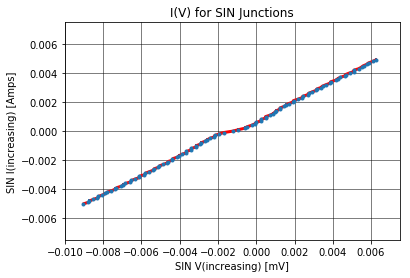

In [213]:
#plt.scatter(SIN_Vinc, SIN_Iinc)
plt.errorbar(SIN_Vinc, SIN_Iinc, yerr=SIN_Vinc_err, marker='.', elinewidth=2, linewidth=0)
#params = [1.0, 0.0015, 0.36204]
#params = [1.1, 0.0015, 0.5]
params = [0.9, 0.0018000000000000004, 0.46203999999999984]
#plt.plot(SIN_Vinc, SINcurr(SIN_Vinc, [130.0, 0.0015, 0.00036204]), color='r', linewidth=1)
plt.plot(SINcurr(SIN_Vinc, params)*params[0], SIN_Iinc, color='r', linewidth=3)
#plt.plot(SIN_Vinc, SINcurr(SIN_Vinc, params), color='r', linewidth=1)

plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.xlim(-0.01, 0.0075)
plt.ylim(-0.0075, 0.0075)
plt.xlabel('SIN V(increasing) [mV]')
plt.ylabel('SIN I(increasing) [Amps]')
plt.title("I(V) for SIN Junctions")

print(str(chi_sq(SIN_Vinc, SINcurr(SIN_Vinc, params)*params[0], 3)))

744.6334238623105


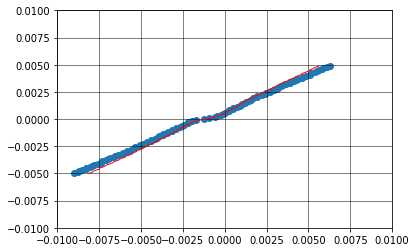

In [206]:
plt.scatter(SIN_Vinc, SIN_Iinc)
params = [1.1, 0.001, 0.26203999999999994]
#plt.plot(SIN_Vinc, SINcurr(SIN_Vinc, [130.0, 0.0015, 0.00036204]), color='r', linewidth=1)
plt.plot(SINcurr(SIN_Vinc, params), SIN_Iinc, color='r', linewidth=1)
plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.xlim(-0.01, 0.01)
plt.ylim(-0.01, 0.01)

print(str(chi_sq(SIN_Vinc, SINcurr(SIN_Vinc, params)/1.1, 3)))

In [ ]:
def bitch(data, fit, degf):
    #I_fit = SINcurr(v, [ R_range[i], del_range[j], T_range[k] ])
    sum_lsq = 0
    for m in range(len(data)):
        lsq = ((data[m] - fit[m])**2)/(10e-5)
        sum_lsq += lsq
        chi_sq = sum_lsq/(len(data)-degf)
    return chi_sq

In [114]:
def bitch_err(data, fit, err, degf):
    #I_fit = SINcurr(v, [ R_range[i], del_range[j], T_range[k] ])
    sum_lsq = 0
    for m in range(len(data)):
        lsq = ((data[m] - fit[m])**2)/(err[m])
        sum_lsq += lsq
        chi_sq = sum_lsq/(len(data)-degf)
    return chi_sq